# EDA & Classification on `Auto` Dataset


<b>11. In this problem, you will develop a model to predict whether a given
car gets high or low gas mileage based on the Auto data set.   </b>

------------------------------------------

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm

plt.style.use('seaborn')
np.random.seed(1)

%matplotlib inline

first wo load the dataset from statsmodel datasets

In [2]:
# loading Auto dataset from R datasets
auto = sm.datasets.get_rdataset('Auto','ISLR')
auto_dataset = auto.data

In [3]:
auto_dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
1,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
3,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
4,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
5,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
auto_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 1 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 30.6+ KB


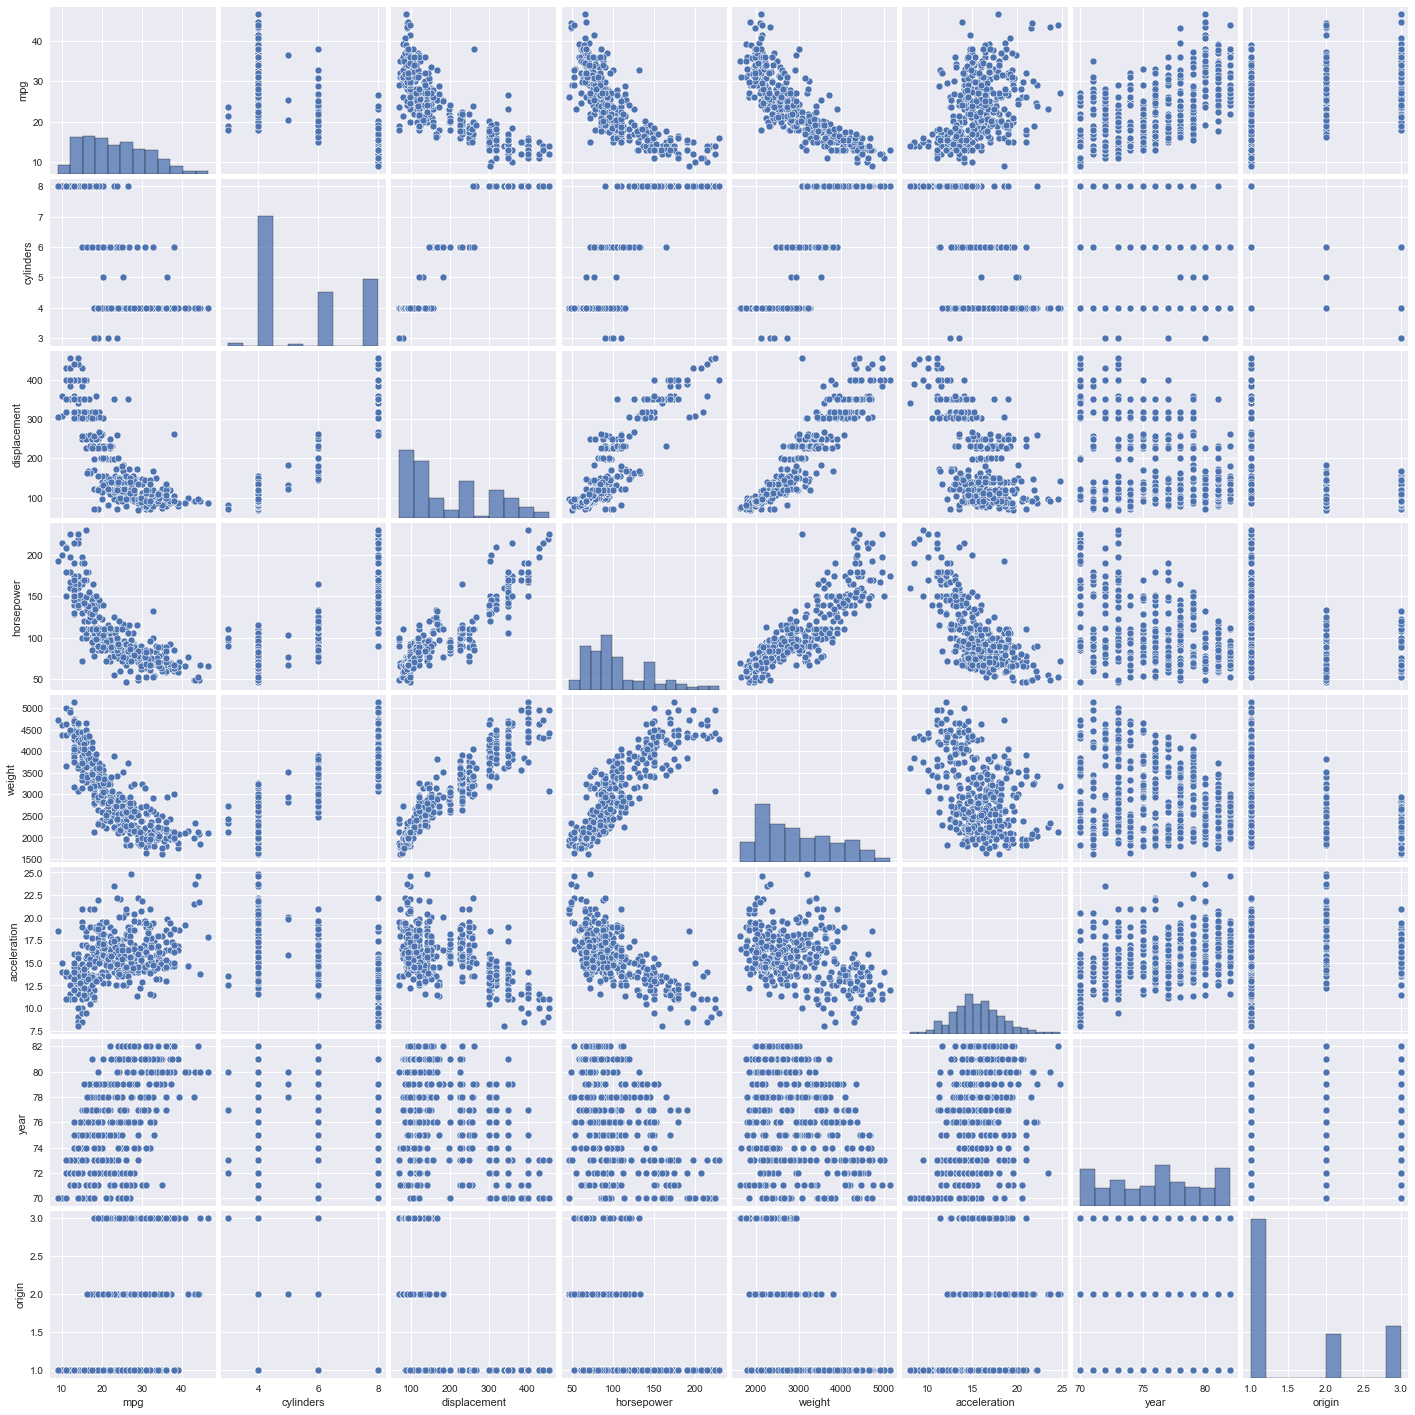

In [5]:
sns.pairplot(auto_dataset.drop(columns=['name']));

c:\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\python\

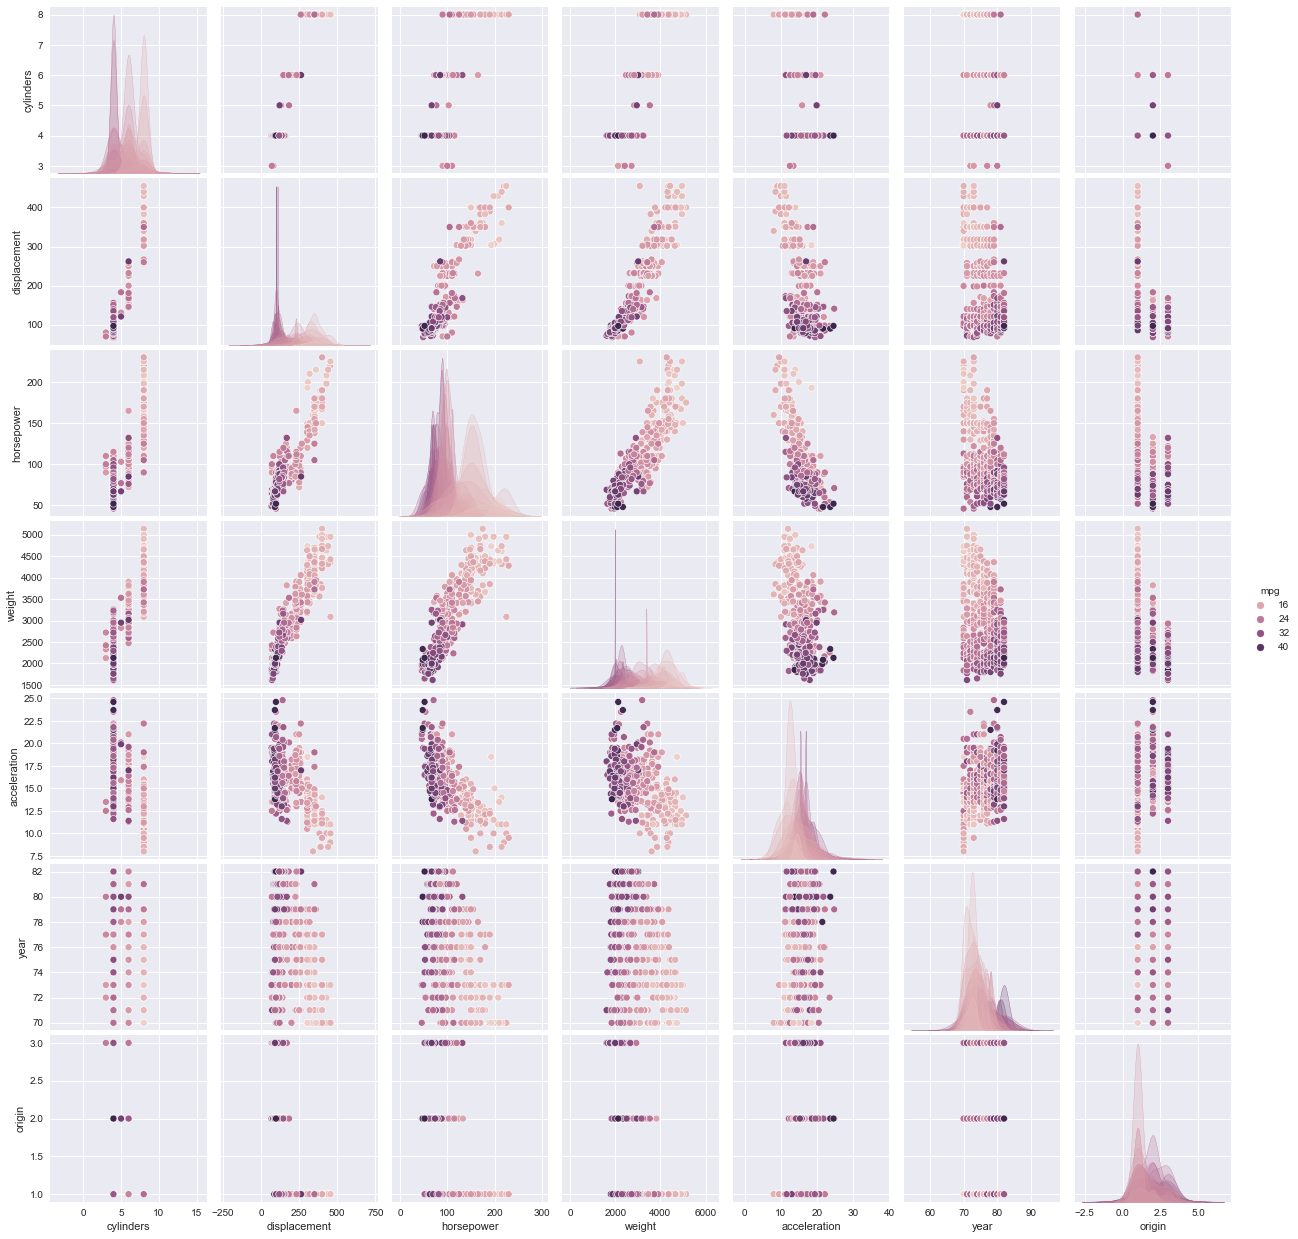

In [6]:
sns.pairplot(auto_dataset.drop(columns=['name']),hue='mpg');

In [7]:
# normalizing the features
numerical_features = ['displacement','horsepower','weight','acceleration']
data_normalized = pd.DataFrame()
for column in numerical_features:
    auto_dataset[column] = auto_dataset[column] - np.mean(auto_dataset[column])
auto_dataset

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
1,18.0,8,112.58801,25.530612,526.415816,-3.541327,70,1,chevrolet chevelle malibu
2,15.0,8,155.58801,60.530612,715.415816,-4.041327,70,1,buick skylark 320
3,18.0,8,123.58801,45.530612,458.415816,-4.541327,70,1,plymouth satellite
4,16.0,8,109.58801,45.530612,455.415816,-3.541327,70,1,amc rebel sst
5,17.0,8,107.58801,35.530612,471.415816,-5.041327,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,-54.41199,-18.469388,-187.584184,0.058673,82,1,ford mustang gl
394,44.0,4,-97.41199,-52.469388,-847.584184,9.058673,82,2,vw pickup
395,32.0,4,-59.41199,-20.469388,-682.584184,-3.941327,82,1,dodge rampage
396,28.0,4,-74.41199,-25.469388,-352.584184,3.058673,82,1,ford ranger


In [8]:
# checking for missing values
auto_dataset.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

the was no missing values

### (a) 
<b>Create a binary variable, mpg01, that contains a 1 if mpg contains
a value above its median, and a 0 if mpg contains a value below
its median. You can compute the median using the median()
function. Note you may find it helpful to use the data.frame()
function to create a single data set containing both mpg01 and
the other Auto variables. </b>

In [9]:
def to_binary(x,median):
    if x > median:
        return(1)
    else:
        return(0)

In [10]:
# (a) - creating 'mpg01' binary target

median = auto_dataset['mpg'].median()
auto_dataset['mpg01'] = auto_dataset['mpg'].apply(lambda x: to_binary(x,median=median))

In [11]:
auto_dataset.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
83,23.0,4,-74.41199,-7.469388,-471.584184,-1.041327,72,3,toyouta corona mark ii (sw),1
168,29.0,4,-97.41199,-29.469388,-806.584184,0.458673,75,3,toyota corolla,1
357,32.4,4,-86.41199,-29.469388,-627.584184,1.258673,81,3,toyota corolla,1
121,19.0,4,-73.41199,7.530612,-109.584184,-0.041327,73,2,volvo 144ea,0
385,38.0,4,-103.41199,-37.469388,-982.584184,0.658673,82,3,datsun 310 gx,1
239,33.5,4,-96.41199,-21.469388,-902.584184,0.358673,77,1,dodge colt m/m,1
80,26.0,4,-98.41199,-35.469388,-788.584184,2.458673,72,2,renault 12 (sw),1
94,14.0,8,123.58801,45.530612,1259.415816,-1.041327,73,1,plymouth fury gran sedan,0
82,28.0,4,-97.41199,-12.469388,-689.584184,1.458673,72,3,datsun 510 (sw),1
338,32.4,4,-87.41199,-32.469388,-687.584184,1.458673,80,3,honda accord,1


--------------------------------
### (b)

<b>Explore the data graphically in order to investigate the association between mpg01 and the other features. Which of the other
features seem most likely to be useful in predicting mpg01? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings. </b>

<AxesSubplot:xlabel='mpg', ylabel='cylinders'>

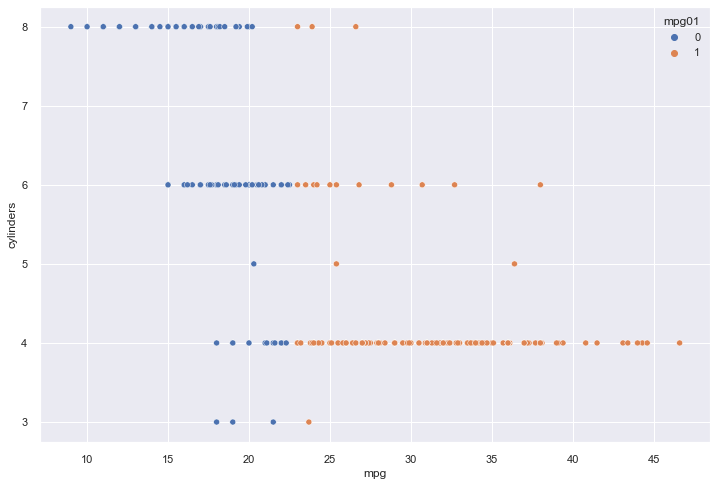

In [12]:
# 'cylinders' feature
sns.set(rc={'figure.figsize':(12,8)})
sns.scatterplot(data=auto_dataset,x='mpg',y='cylinders',hue='mpg01')

cylinders:

looks highly important for label calssification

------------------------

<AxesSubplot:xlabel='mpg01', ylabel='displacement'>

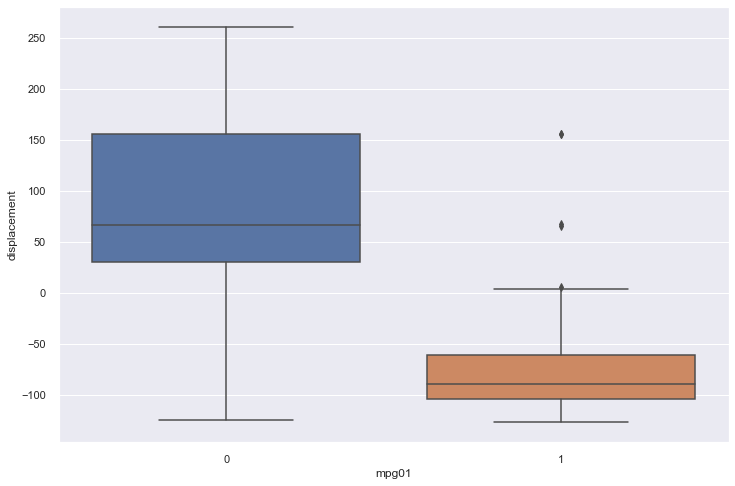

In [13]:
sns.boxplot(data=auto_dataset,x='mpg01',y='displacement')

displacement:

looks important for label calssification

------------------------

<AxesSubplot:xlabel='mpg01', ylabel='horsepower'>

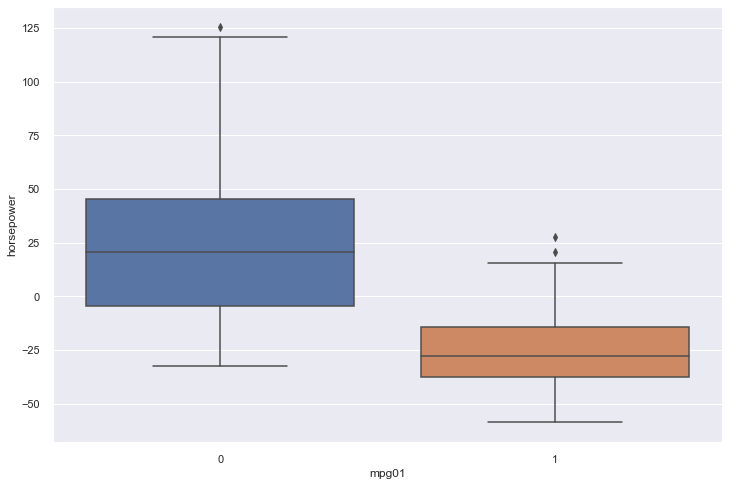

In [14]:
sns.boxplot(data=auto_dataset,x='mpg01',y='horsepower')

<AxesSubplot:xlabel='horsepower', ylabel='displacement'>

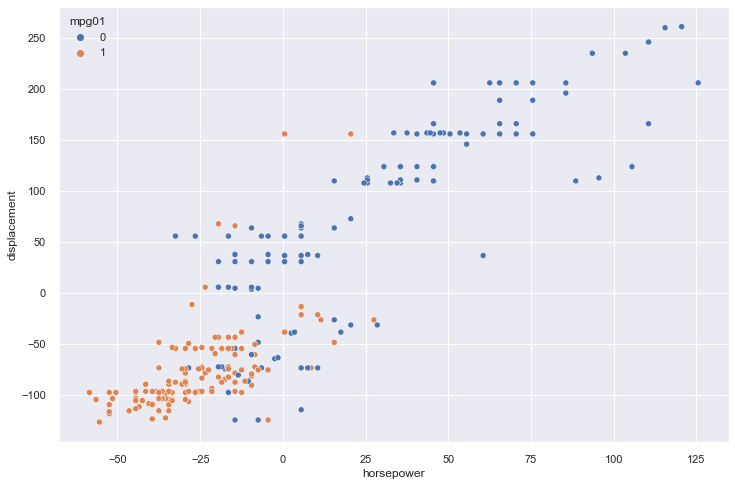

In [15]:
sns.scatterplot(data=auto_dataset,x='horsepower',y='displacement',hue='mpg01')

combination of horsepower and displacement could have positive impact on model performance

--------------------------------

<AxesSubplot:xlabel='mpg01', ylabel='weight'>

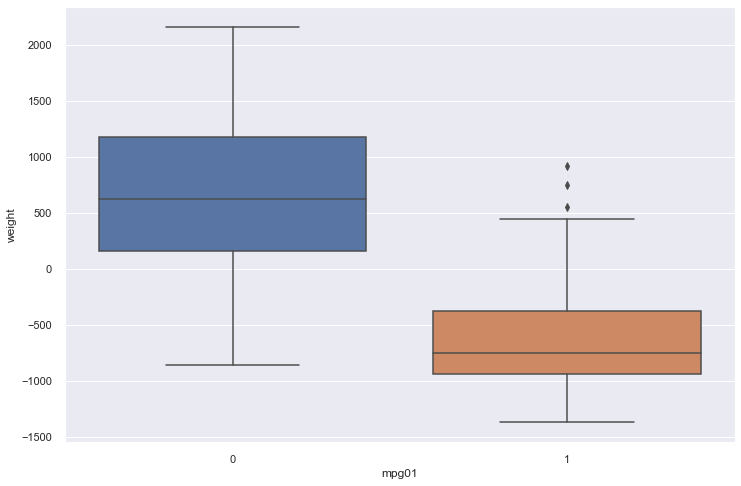

In [16]:
sns.boxplot(data=auto_dataset,x='mpg01',y='weight')

<AxesSubplot:xlabel='mpg01', ylabel='acceleration'>

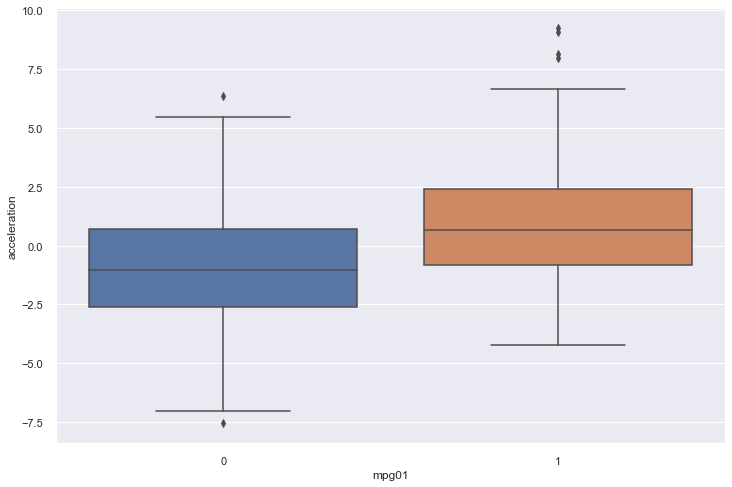

In [17]:
sns.boxplot(data=auto_dataset,x='mpg01',y='acceleration')

<AxesSubplot:xlabel='acceleration', ylabel='weight'>

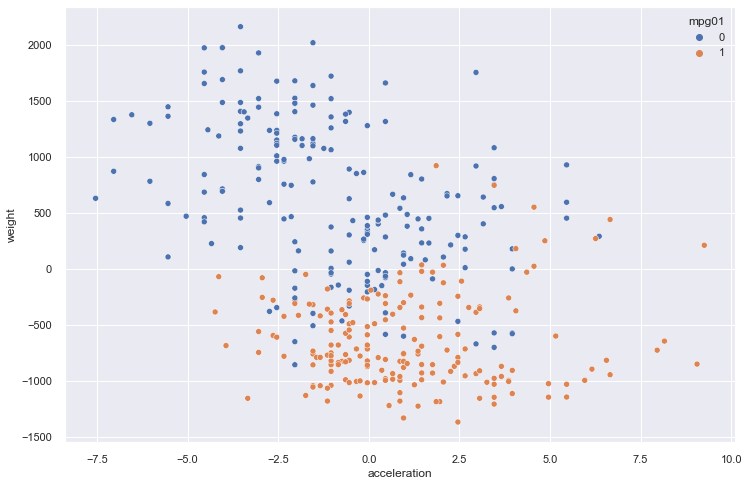

In [18]:
# 'horsepower' and 'wight' combination

sns.scatterplot(data=auto_dataset,x='acceleration',y='weight',hue='mpg01')

ratio between weghtand acceleration can be helpful as a feature


<AxesSubplot:xlabel='mpg01', ylabel='acceleration'>

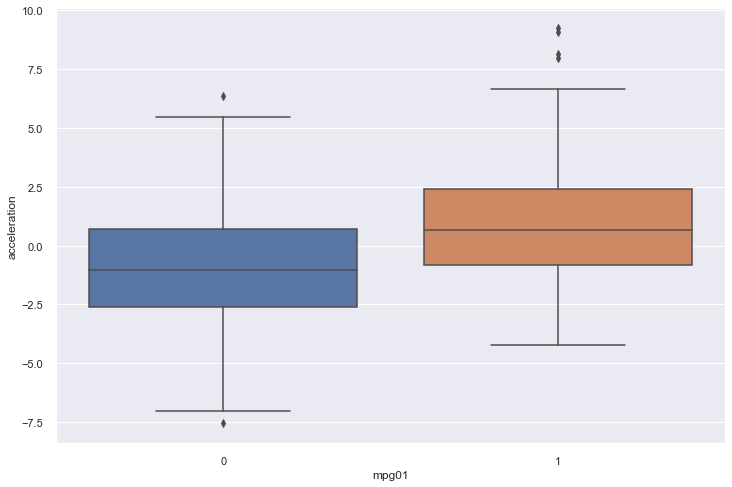

In [19]:
# 'acceleration' feature

sns.boxplot(data=auto_dataset,x='mpg01',y='acceleration')

<AxesSubplot:xlabel='year', ylabel='mpg'>

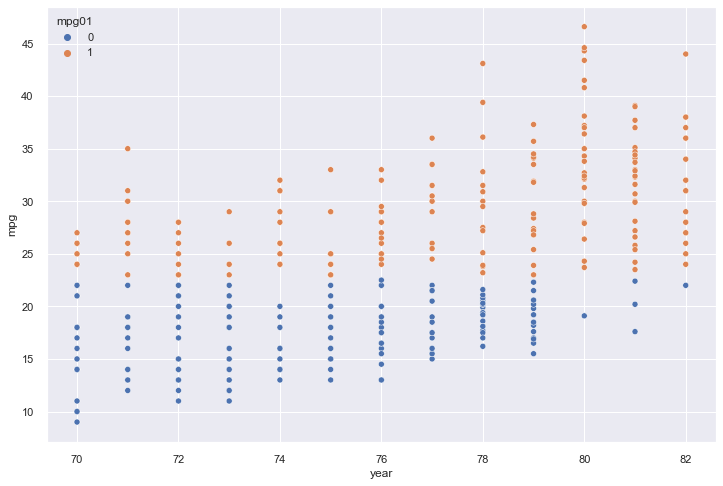

In [20]:
sns.scatterplot(data=auto_dataset,x='year',y='mpg',hue='mpg01')

New features to build:

displacement/horsepower

horsepower/weight

In [21]:
# creating new features

auto_dataset['displacement/horsepower'] = auto_dataset.displacement / auto_dataset.horsepower
auto_dataset['horsepower/weight'] = auto_dataset.horsepower / auto_dataset.weight

-----------------------------------

### (c)

<b>Split the data into a training set and a test set.</b>

In [22]:
from sklearn.model_selection import train_test_split

In [23]:

features = ['cylinders', 'displacement', 'horsepower', 'weight']

X = auto_dataset[features].copy()
y = auto_dataset['mpg01'].copy()

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=5)

-----------------------------
### (d)
<b>Perform LDA on the training data in order to predict mpg01
using the variables that seemed most associated with mpg01 in
(b). What is the test error of the model obtained?</b>

In [24]:
# importing modules from sklearn

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier,kneighbors_graph
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [25]:
# (d) LDA Model
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train,y_train)
lda_score = lda_model.score(X_test,y_test)
lda_score_train = lda_model.score(X_train,y_train)

print('LDA model  Accuracy on test data = %',  round(100*lda_score,3))
print('Test Error of the LDA model = %', round(100*(1-lda_score),3))

LDA model  Accuracy on test data = % 91.525
Test Error of the LDA model = % 8.475


-----------------------------
### (e)
<b>Perform QDA on the training data in order to predict mpg01
using the variables that seemed most associated with mpg01 in
(b). What is the test error of the model obtained?</b>

In [26]:
# (e) QDA

qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train,y_train)
qda_score = qda_model.score(X_test,y_test)

print('QDA model Accuracy on test data = %',  round(100*qda_score,3))
print('Test Error of the QDA model = %', round(100*(1-qda_score),3))

QDA model Accuracy on test data = % 90.678
Test Error of the QDA model = % 9.322


-----------------------------
### (f)
<b>Perform logistic regression on the training data in order to predict mpg01 using the variables that seemed most associated with
mpg01 in (b). What is the test error of the model obtained?</b>

In [27]:
logistic_reg = LogisticRegression(random_state=41, max_iter=500)
logistic_reg.fit(X_train,y_train)
lr_score = logistic_reg.score(X_test,y_test)
print('logistic regression model Accuracy on test data = %',  round(100*lr_score,3))
print('Test Error of the logistic regression model = %', round(100*(1-lr_score),3))

logistic regression model Accuracy on test data = % 91.525
Test Error of the logistic regression model = % 8.475


-----------------------------
### (g)
<b>Perform KNN on the training data, with several values of K, in
order to predict mpg01. Use only the variables that seemed most
associated with mpg01 in (b). What test errors do you obtain?
Which value of K seems to perform the best on this data set?
</b>

In [28]:
neighbours = list(range(3,30))
acc = []
for n in neighbours:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train,y_train)
    acc.append(knn.score(X_test,y_test))

Text(0.5, 1.0, 'KNN Model Selection')

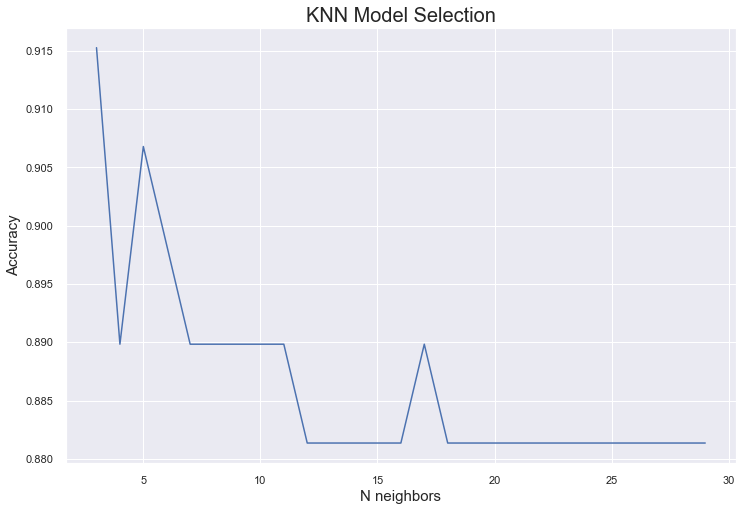

In [29]:
plt.plot(neighbours,acc)
plt.xlabel('N neighbors',size=15)
plt.ylabel('Accuracy',size=15)
plt.title('KNN Model Selection',size=20)

using K=5 neighbours yield the best performance on test data

------------------------

In [30]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,y_train)
knn_score = knn.score(X_test,y_test)
knn_score_train = knn.score(X_train,y_train)

print('KNN model Accuracy on test data = %',  round(100*knn_score,3))
print('Test Error of the KNN model = %', round(100*(1-knn_score),3))

KNN model Accuracy on test data = % 88.983
Test Error of the KNN model = % 11.017


------------------
## Random Forest Model:

In [31]:
rf = RandomForestClassifier(n_estimators=10,max_leaf_nodes=10)
rf.fit(X_train,y_train)
rf_score = rf.score(X_test,y_test)
rf_score_train = rf.score(X_train,y_train)

print('Random Forest model Accuracy on train data = %',  round(100*rf_score_train,3))
print('train Error of the Random Forest model = %', round(100*(1-rf_score_train),3),'\n')

print('Random Forest model Accuracy on test data = %',  round(100*rf_score,3))
print('Test Error of the Random Forest model = %', round(100*(1-rf_score),3))

Random Forest model Accuracy on train data = % 94.526
train Error of the Random Forest model = % 5.474 

Random Forest model Accuracy on test data = % 92.373
Test Error of the Random Forest model = % 7.627
